# FYP Teh Chen Ming

# Import Libraries

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


# Load Dataset

In [275]:
df = pd.read_csv('./solar_weather.csv')

In [276]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

# Description

In [278]:
print(df.describe())

       Energy delta[Wh]            GHI           temp       pressure  \
count     196776.000000  196776.000000  196776.000000  196776.000000   
mean         573.008228      32.596538       9.790521    1015.292780   
std         1044.824047      52.172018       7.995428       9.585773   
min            0.000000       0.000000     -16.600000     977.000000   
25%            0.000000       0.000000       3.600000    1010.000000   
50%            0.000000       1.600000       9.300000    1016.000000   
75%          577.000000      46.800000      15.700000    1021.000000   
max         5020.000000     229.200000      35.800000    1047.000000   

            humidity     wind_speed        rain_1h        snow_1h  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean       79.810566       3.937746       0.066035       0.007148   
std        15.604459       1.821694       0.278913       0.069710   
min        22.000000       0.000000       0.000000       0.000000   
25%   

In [279]:
df.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

- Our findings
1) There are **17 Columns** in dataset. Out of which 6 columns are of **float** type, 10 columns are of **integer** type, 1 is of **object** type.
2) There are **196776 Rows** in dataset.
3) As we can see the column **Time** is of object type we need to convert it in **datetime** format. 
4) There will be 0 null entries in our data set as our columns include **non-null** condition.


# Feature Selection

### We will clear some columns and calculate ourselve

In [280]:
import pandas as pd

# Select only the specified columns
keep_column = [
    'Time', 
    'Energy delta[Wh]', 
    'GHI', 
    'temp', 
    'pressure', 
    'humidity', 
    'wind_speed', 
    'rain_1h', 
    'snow_1h', 
    'clouds_all'
]

# Create a new DataFrame with only the specified columns
df = df[keep_column]

df.head()


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100


## Clean all infinite value to Nan

In [281]:
# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [282]:
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Verify the changes
print(df.info())  # To check the updated data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              196776 non-null  datetime64[ns]
 1   Energy delta[Wh]  196776 non-null  int64         
 2   GHI               196776 non-null  float64       
 3   temp              196776 non-null  float64       
 4   pressure          196776 non-null  int64         
 5   humidity          196776 non-null  int64         
 6   wind_speed        196776 non-null  float64       
 7   rain_1h           196776 non-null  float64       
 8   snow_1h           196776 non-null  float64       
 9   clouds_all        196776 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 15.0 MB
None


# Initial EDA

### spliting data into normal, day/night, seasonal data to do EDA

In [283]:
# Add the 'isDayTime' column, day is 1 and night is 0
df['isDayTime'] = (df['GHI'] > 0).astype(int)

# Segment data for winter months (December, January, February)
df['Month'] = df['Time'].dt.month
winter_df = df[df['Month'].isin([12, 1, 2])]

# Drop the temporary Month column
winter_df = winter_df.drop(columns=['Month'])



### Now detecting abnormal data, noise and outlier on general column that are not affected by day and night or seasonal factor

In [284]:
# Variables to analyze
variables = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all']

In [285]:
# # Generate histograms for distributions
# for variable in variables:
#     plt.figure(figsize=(8, 5))
#     plt.hist(df[variable], bins=30, edgecolor='black', alpha=0.7)
#     plt.title(f'Histogram of {variable}')
#     plt.xlabel(variable)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

# # Generate boxplots to identify variability and outliers
# for variable in variables:
#     plt.figure(figsize=(8, 5))
#     plt.boxplot(df[variable], vert=False)
#     plt.title(f'Boxplot of {variable}')
#     plt.xlabel(variable)
#     plt.grid(True)
#     plt.show()

# # Generate time-series trends for selected variables
# for variable in variables:
#     plt.figure(figsize=(12, 6))
#     plt.plot(df['Time'], df[variable], alpha=0.7, linestyle='-', marker='o', markersize=1)
#     plt.title(f'Time Series of {variable}')
#     plt.xlabel('Time')
#     plt.ylabel(variable)
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


### Nothing affect much, raining can be ignore as raining is not everyday

### Now on day/night specific data

In [286]:
# Separate data into day and night
day_data = df[df['isDayTime'] == 1]
night_data = df[df['isDayTime'] == 0]

# Variables to analyze
variables = ['GHI', 'Energy delta[Wh]']

In [287]:
# # Generate graphs for day (yellow) and night (blue)
# for variable in variables:
#     # Day histogram
#     plt.figure(figsize=(12, 5))
    
#     # Day Graph
#     plt.subplot(1, 2, 1)
#     plt.hist(day_data[variable], bins=30, color='yellow', edgecolor='black', alpha=0.7)
#     plt.title(f'{variable} Distribution - Day')
#     plt.xlabel(variable)
#     plt.ylabel('Frequency')
#     plt.grid(True)
    
#     # Night Graph
#     plt.subplot(1, 2, 2)
#     plt.hist(night_data[variable], bins=30, color='blue', edgecolor='black', alpha=0.7)
#     plt.title(f'{variable} Distribution - Night')
#     plt.xlabel(variable)
#     plt.ylabel('Frequency')
#     plt.grid(True)
    
#     plt.tight_layout()
#     plt.show()
    
#     # Boxplots
#     plt.figure(figsize=(12, 5))
    
#     # Day Boxplot
#     plt.subplot(1, 2, 1)
#     plt.boxplot(day_data[variable], vert=False, patch_artist=True,
#                 boxprops=dict(facecolor='yellow', color='black'))
#     plt.title(f'{variable} Boxplot - Day')
#     plt.xlabel(variable)
#     plt.grid(True)
    
#     # Night Boxplot
#     plt.subplot(1, 2, 2)
#     plt.boxplot(night_data[variable], vert=False, patch_artist=True,
#                 boxprops=dict(facecolor='blue', color='black'))
#     plt.title(f'{variable} Boxplot - Night')
#     plt.xlabel(variable)
#     plt.grid(True)
    
#     plt.tight_layout()
#     plt.show()

#     plt.figure(figsize=(12, 6))
#     plt.plot(df['Time'], df[variable], alpha=0.7, linestyle='-', marker='o', markersize=1)
#     plt.title(f'{variable} Time Series')
#     plt.xlabel('Time')
#     plt.ylabel(variable)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


    


### Outlier found in the energy delta in boxplot now we will clean it

In [288]:
# Filter rows where Energy delta[Wh] has significant values during the night
night_outliers = night_data[night_data['Energy delta[Wh]'] > 0]

night_outliers


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,Month
3808,2017-02-14 16:00:00,8,0.0,1.5,1037,60,1.0,0.0,0.0,0,0,2
5250,2017-03-01 16:30:00,2,0.0,6.4,999,73,2.8,0.0,0.0,79,0,3
6788,2017-03-17 17:00:00,2,0.0,5.0,1007,67,5.4,0.0,0.0,99,0,3
9960,2017-04-19 18:00:00,6,0.0,2.3,1034,65,4.3,0.0,0.0,9,0,4
10729,2017-04-27 18:15:00,5,0.0,7.9,1015,74,0.3,0.0,0.0,47,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
188621,2022-06-07 19:15:00,5,0.0,17.8,1011,77,3.3,0.0,0.0,71,0,6
191885,2022-07-11 19:15:00,5,0.0,17.9,1020,67,2.6,0.0,0.0,21,0,7
193132,2022-07-24 19:00:00,6,0.0,21.7,1018,61,1.9,0.0,0.0,96,0,7
194762,2022-08-10 18:30:00,3,0.0,22.7,1025,45,3.2,0.0,0.0,0,0,8


In [289]:
# processed_df is to prevent changes to the original dataset
processed_df = df.copy()
processed_df['Time'] = pd.to_datetime(processed_df['Time'])
processed_df = processed_df.set_index('Time')  # Set 'Time' as the index

# Replace outliers (Energy delta[Wh] > 0 during night) with 0
outlier_condition = (processed_df['isDayTime'] == 0) & (processed_df['Energy delta[Wh]'] > 0)
processed_df.loc[outlier_condition, 'Energy delta[Wh]'] = 0

# Reset the index to restore the original structure
processed_df = processed_df.reset_index()

# Display the updated dataset after treating outliers
processed_df.head()



,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,Month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,1


In [290]:
df = processed_df.copy()
# Separate data into day and night
day_data = df[df['isDayTime'] == 1]
night_data = df[df['isDayTime'] == 0]

In [291]:
# variable = 'Energy delta[Wh]'
# # Boxplots
# plt.figure(figsize=(12, 5))

# # Day Boxplot
# plt.subplot(1, 2, 1)
# plt.boxplot(day_data[variable], vert=False, patch_artist=True,
#             boxprops=dict(facecolor='yellow', color='black'))
# plt.title(f'{variable} Boxplot - Day')
# plt.xlabel(variable)
# plt.grid(True)

# # Night Boxplot
# plt.subplot(1, 2, 2)
# plt.boxplot(night_data[variable], vert=False, patch_artist=True,
#             boxprops=dict(facecolor='blue', color='black'))
# plt.title(f'{variable} Boxplot - Night')
# plt.xlabel(variable)
# plt.grid(True)

# plt.tight_layout()
# plt.show()

### Now on snowdata

In [292]:
# # Filter the winter dataframe for snowfall analysis
# winter_snow_data = winter_df.copy()

# # Descriptive statistics for snow_1h in the winter data
# snow_stats = winter_snow_data['snow_1h'].describe()

# # Visualization
# # Histogram for snowfall distribution
# plt.figure(figsize=(8, 5))
# plt.hist(winter_snow_data['snow_1h'], bins=30, edgecolor='black', alpha=0.7)
# plt.title('Histogram of Snowfall (snow_1h) in Winter')
# plt.xlabel('Snowfall (1h)')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

# # Boxplot for snowfall variability and outliers
# plt.figure(figsize=(8, 5))
# plt.boxplot(winter_snow_data['snow_1h'], vert=False)
# plt.title('Boxplot of Snowfall (snow_1h) in Winter')
# plt.xlabel('Snowfall (1h)')
# plt.grid(True)
# plt.show()

# # Time-series plot for snowfall trends
# plt.figure(figsize=(12, 6))
# plt.plot(winter_snow_data['Time'], winter_snow_data['snow_1h'], linestyle='-', marker='o', markersize=1, alpha=0.7)
# plt.title('Time Series of Snowfall (snow_1h) in Winter')
# plt.xlabel('Time')
# plt.ylabel('Snowfall (1h)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# snow_stats


### Snow same as rain not everyday having so also normal

### Only the day night data is preprocessed other is fine

# Feature Enginnering some extra column

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              196776 non-null  datetime64[ns]
 1   Energy delta[Wh]  196776 non-null  int64         
 2   GHI               196776 non-null  float64       
 3   temp              196776 non-null  float64       
 4   pressure          196776 non-null  int64         
 5   humidity          196776 non-null  int64         
 6   wind_speed        196776 non-null  float64       
 7   rain_1h           196776 non-null  float64       
 8   snow_1h           196776 non-null  float64       
 9   clouds_all        196776 non-null  int64         
 10  isDayTime         196776 non-null  int32         
 11  Month             196776 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(4)
memory usage: 16.5 MB


### Data transformation

In [294]:
# Ensure the 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

### Adding date and time feature

In [295]:
df['Year'] = df['Time'].dt.year
df['Month_num'] = df['Time'].dt.month  # Numeric month for modelling
df['DayOfYear'] = df['Time'].dt.dayofyear # Day of the year (1 to 365)

# Extract the week number
df['Week'] = df['Time'].dt.isocalendar().week

df['Minute'] = df['Time'].dt.minute
df['Hour'] = df['Time'].dt.hour

In [296]:
# Add the month name and add it as a new column
df['Month'] = df['Time'].dt.month_name()

In [297]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,Month,Year,Month_num,DayOfYear,Week,Minute,Hour
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,January,2017,1,1,52,0,0
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,January,2017,1,1,52,15,0
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,January,2017,1,1,52,30,0
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,January,2017,1,1,52,45,0
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,January,2017,1,1,52,0,1


### Adding seasonal column

In [298]:



# Determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:  # December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # September, October, November
        return 'Autumn'

# Apply the season function to the 'Time' column
df['Season'] = df['Month_num'].apply(get_season)


# Add the day of the week column
df['Day'] = df['Time'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Verify the changes
print(df[['Time', 'Season', 'Month' , 'Week', 'Day', 'Hour']].head())




                 Time  Season    Month  Week     Day  Hour
0 2017-01-01 00:00:00  Winter  January    52  Sunday     0
1 2017-01-01 00:15:00  Winter  January    52  Sunday     0
2 2017-01-01 00:30:00  Winter  January    52  Sunday     0
3 2017-01-01 00:45:00  Winter  January    52  Sunday     0
4 2017-01-01 01:00:00  Winter  January    52  Sunday     1


## Turning the datetime features to sin and cos to let them have the feature of cyclic

In [299]:
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Week_sin'] = np.sin(2 * np.pi * df['Week'] / 53)
df['Week_cos'] = np.cos(2 * np.pi * df['Week'] / 53)

df['Minute_sin'] = np.sin(2 * np.pi * df['Minute'] / 60)
df['Minute_cos'] = np.cos(2 * np.pi * df['Minute'] / 60)

# Drop the original Hour column (no need still need to refer)
# df.drop(columns=['Hour'], inplace=True)

print(df.head())  # Check transformed data


                 Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0 2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1 2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2 2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3 2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4 2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  ...  Minute Hour  Season     Day  \
0         4.9      0.0      0.0         100  ...       0    0  Winter  Sunday   
1         4.9      0.0      0.0         100  ...      15    0  Winter  Sunday   
2         4.9      0.0      0.0         100  ...      30    0  Winter  Sunday   
3         4.9      0.0      0.0         100  ...      45    0  Winter  Sunday   
4         5.2      0.0      0.0         100  ...       0    1  Winter  Sunday   

   Hour_sin  Hour_cos  Week_sin  Week_cos    Minute_sin    Minute_co

# Data Standarization

In [300]:
# from sklearn.preprocessing import StandardScaler

# # Select the columns to apply scaling (excluding 'Time' and categorical columns like 'isDayTime')
# columns_to_scale = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'Energy delta[Wh]']

# # Create copies of the dataset
# df_standardized = df.copy()

# # Standardization
# scaler_standard = StandardScaler()
# df_standardized[columns_to_scale] = scaler_standard.fit_transform(df_standardized[columns_to_scale])

# df_standardized.head()

In [301]:
# df_standardized.describe()

# Data Normalization

In [302]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 
                'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


## One-hot encoder

In [303]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,...,Minute,Hour,Season,Day,Hour_sin,Hour_cos,Week_sin,Week_cos,Minute_sin,Minute_cos
0,2017-01-01 00:00:00,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,...,0,0,Winter,Sunday,0.000000,1.000000,-0.118273,0.992981,0.000000e+00,1.000000e+00
1,2017-01-01 00:15:00,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,...,15,0,Winter,Sunday,0.000000,1.000000,-0.118273,0.992981,1.000000e+00,2.832769e-16
2,2017-01-01 00:30:00,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,...,30,0,Winter,Sunday,0.000000,1.000000,-0.118273,0.992981,5.665539e-16,-1.000000e+00
3,2017-01-01 00:45:00,0.0,0.0,0.347328,0.628571,1.0,0.342657,0.0,0.0,1.0,...,45,0,Winter,Sunday,0.000000,1.000000,-0.118273,0.992981,-1.000000e+00,-1.836970e-16
4,2017-01-01 01:00:00,0.0,0.0,0.349237,0.614286,1.0,0.363636,0.0,0.0,1.0,...,0,1,Winter,Sunday,0.258819,0.965926,-0.118273,0.992981,0.000000e+00,1.000000e+00


In [304]:
df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isDayTime', 'Month',
       'Year', 'Month_num', 'DayOfYear', 'Week', 'Minute', 'Hour', 'Season',
       'Day', 'Hour_sin', 'Hour_cos', 'Week_sin', 'Week_cos', 'Minute_sin',
       'Minute_cos'],
      dtype='object')

In [305]:
# Convert week (Monday=0, ..., Sunday=6) and season (e.g., Winter=0, Spring=1, ...) to numerical values first
df['Week'] = df['Week'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
})

df['Season'] = df['Season'].map({
    'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3
})

# Apply cyclical encoding
df['Weekday_sin'] = np.sin(2 * np.pi * df['Week'] / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Week'] / 7)

df['Season_sin'] = np.sin(2 * np.pi * df['Season'] / 4)
df['Season_cos'] = np.cos(2 * np.pi * df['Season'] / 4)

# Drop original columns after encoding
df.drop(columns=['Week', 'Season'], inplace=True)


In [306]:
df.drop(columns=['Time'], inplace=True)


In [307]:
df['Energy_lag_1'] = df['Energy delta[Wh]'].shift(1)
df['Energy_lag_2'] = df['Energy delta[Wh]'].shift(2)

In [308]:
df.fillna(0, inplace=True)

In [309]:
df = df.select_dtypes(exclude=['object'])


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Energy delta[Wh]  196776 non-null  float64
 1   GHI               196776 non-null  float64
 2   temp              196776 non-null  float64
 3   pressure          196776 non-null  float64
 4   humidity          196776 non-null  float64
 5   wind_speed        196776 non-null  float64
 6   rain_1h           196776 non-null  float64
 7   snow_1h           196776 non-null  float64
 8   clouds_all        196776 non-null  float64
 9   isDayTime         196776 non-null  int32  
 10  Year              196776 non-null  int32  
 11  Month_num         196776 non-null  int32  
 12  DayOfYear         196776 non-null  int32  
 13  Minute            196776 non-null  int32  
 14  Hour              196776 non-null  int32  
 15  Hour_sin          196776 non-null  float64
 16  Hour_cos          19

In [311]:
df.head(50)

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isDayTime,...,Week_sin,Week_cos,Minute_sin,Minute_cos,Weekday_sin,Weekday_cos,Season_sin,Season_cos,Energy_lag_1,Energy_lag_2
0,0.000000,0.000000,0.347328,0.628571,1.000000,0.342657,0.0,0.0,1.00,0,...,-0.118273,0.992981,0.000000e+00,1.000000e+00,0.0,0.0,0.0,1.0,0.000000,0.000000
1,0.000000,0.000000,0.347328,0.628571,1.000000,0.342657,0.0,0.0,1.00,0,...,-0.118273,0.992981,1.000000e+00,2.832769e-16,0.0,0.0,0.0,1.0,0.000000,0.000000
2,0.000000,0.000000,0.347328,0.628571,1.000000,0.342657,0.0,0.0,1.00,0,...,-0.118273,0.992981,5.665539e-16,-1.000000e+00,0.0,0.0,0.0,1.0,0.000000,0.000000
3,0.000000,0.000000,0.347328,0.628571,1.000000,0.342657,0.0,0.0,1.00,0,...,-0.118273,0.992981,-1.000000e+00,-1.836970e-16,0.0,0.0,0.0,1.0,0.000000,0.000000
4,0.000000,0.000000,0.349237,0.614286,1.000000,0.363636,0.0,0.0,1.00,0,...,-0.118273,0.992981,0.000000e+00,1.000000e+00,0.0,0.0,0.0,1.0,0.000000,0.000000
5,0.000000,0.000000,0.349237,0.614286,1.000000,0.363636,0.0,0.0,1.00,0,...,-0.118273,0.992981,1.000000e+00,2.832769e-16,0.0,0.0,0.0,1.0,0.000000,0.000000
6,0.000000,0.000000,0.349237,0.614286,1.000000,0.363636,0.0,0.0,1.00,0,...,-0.118273,0.992981,5.665539e-16,-1.000000e+00,0.0,0.0,0.0,1.0,0.000000,0.000000
7,0.000000,0.000000,0.349237,0.614286,1.000000,0.363636,0.0,0.0,1.00,0,...,-0.118273,0.992981,-1.000000e+00,-1.836970e-16,0.0,0.0,0.0,1.0,0.000000,0.000000
8,0.000000,0.000000,0.353053,0.614286,1.000000,0.384615,0.0,0.0,1.00,0,...,-0.118273,0.992981,0.000000e+00,1.000000e+00,0.0,0.0,0.0,1.0,0.000000,0.000000
9,0.000000,0.000000,0.353053,0.614286,1.000000,0.384615,0.0,0.0,1.00,0,...,-0.118273,0.992981,1.000000e+00,2.832769e-16,0.0,0.0,0.0,1.0,0.000000,0.000000


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


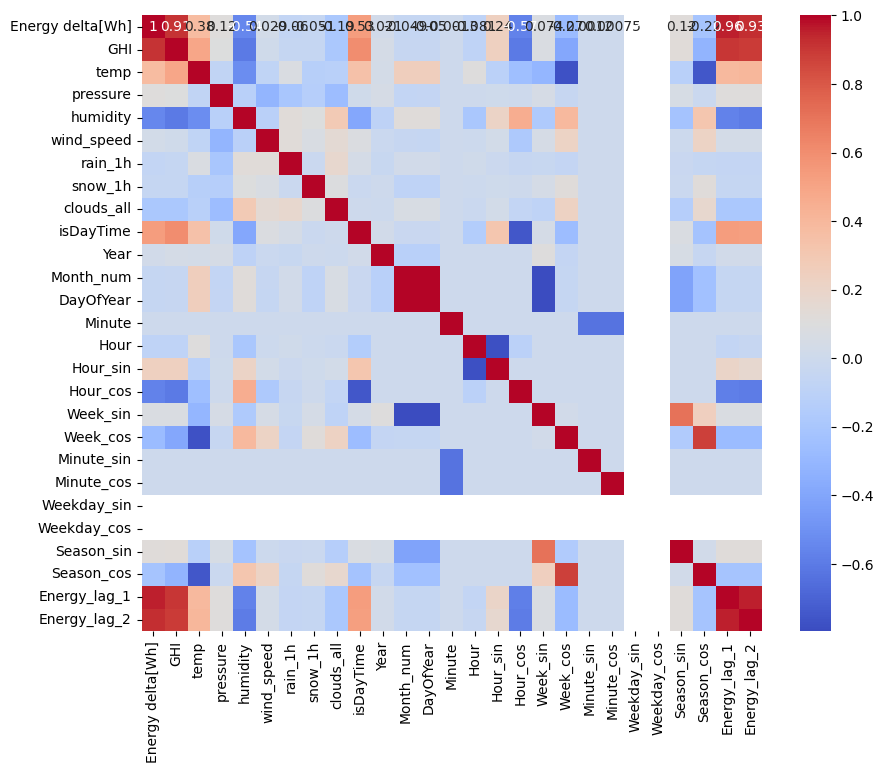

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# To CSV

In [313]:
df.to_csv('solar_weather_processed.csv', index=False)

# Finding Relations

In [314]:
# df.head()

In [315]:
# df.info()

In [316]:
# # Numerical columns in the dataset
# numerical_columns = [
#     'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 
#     'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isDayTime'
# ]

# # Assuming processed_df is the DataFrame from the user's dataset
# # Calculate the correlation matrix for numerical columns
# correlation_matrix = df[numerical_columns].corr()


# # Improved heatmap to show all values in boxes
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 8})
# plt.title('Correlation Heatmap with All Values Annotated')
# plt.tight_layout()
# plt.show()


In [317]:
# # Generate KDE plots for all specified variables against Energy delta[Wh]

# # Variables to compare with Energy delta[Wh]
# variables_to_compare = ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']

# for variable in variables_to_compare:
#     plt.figure(figsize=(8, 6))
#     # KDE plot for better visualization of relationships
#     sns.kdeplot(data=processed_df, x=variable, y='Energy delta[Wh]', cmap='Blues', fill=True)
#     corr_value = processed_df[variable].corr(processed_df['Energy delta[Wh]'])
#     plt.title(f'KDE Plot of {variable} vs Energy delta[Wh] (Correlation = {corr_value:.2f})')
#     plt.xlabel(variable)
#     plt.ylabel('Energy delta[Wh]')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


# GHI

In [318]:
# figure, ax = plt.subplots(2,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between GHI and Energy Delta over Time(Hour) ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Energy delta for Each Hour')
# ax[1].title.set_text('Line Plot Represent the Average GHI Over for Each Hour')
# plt.show()

In [319]:
# figure, ax = plt.subplots(2,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI and Energy Delta for each month ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Energy delta for each month')
# ax[1].title.set_text('Line Plot Represent the Average GHI for each month')
# plt.show()

# SNOW

In [320]:
# figure, ax = plt.subplots(3,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['snow_1h'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[2])
# ax[2].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI and Energy Delta Snow Fall for Each Hour ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Snow Fall for Each Hour')
# ax[1].title.set_text('Line Plot Represent the Average GHI for Each Hour')
# ax[2].title.set_text('Line Plot Represent the Average Energy delta for Each Hour')
# plt.show()

In [321]:
# figure, ax = plt.subplots(3,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['snow_1h'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[2])
# ax[2].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI and Energy Delta Snow Fall for Each Month ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Snow Fall for Each Month')
# ax[1].title.set_text('Line Plot Represent the Average GHI for Each Month')
# ax[2].title.set_text('Line Plot Represent the Average Energy delta for Each Month')
# plt.show()

# Cloud

In [322]:
# figure, ax = plt.subplots(3,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['clouds_all'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[2])
# ax[2].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI, Energy Delta and Cloud Cover for Each Hour ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Cloud Cover For Each Hour')
# ax[1].title.set_text('Line Plot Represent the Average GHI For Each Hour')
# ax[2].title.set_text('Line Plot Represent the Average Energy delta For Each Hour')
# plt.show()

In [323]:
# figure, ax = plt.subplots(3,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['clouds_all'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[2])
# ax[2].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of GHI, Energy Delta and Cloud Cover for Each Month ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Cloud Cover For Each Month')
# ax[1].title.set_text('Line Plot Represent the Average GHI For Each Month')
# ax[2].title.set_text('Line Plot Represent the Average Energy delta For Each Month')
# plt.show()

# Wind Energy

In [324]:
# figure, ax = plt.subplots(2,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['wind_speed'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of Wind Speed and Energy Delta for Each Hour ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Wind Speed for Each Hour')
# ax[1].title.set_text('Line Plot Represent the Average Energy Delta for Each Hour')
# plt.show()

In [325]:
# figure, ax = plt.subplots(2,1,figsize = (20,10))
# plt.subplots_adjust(hspace=0.5)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['wind_speed'], ax = ax[0])
# ax[0].tick_params('x', labelrotation=75)
# sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[1])
# ax[1].tick_params('x', labelrotation=75)
# figure.suptitle('Relation Between Average of Wind Speed and Energy Delta for Each Month ', fontsize=25)
# ax[0].title.set_text('Line Plot Represent the Average Wind Speed for Each Month')
# ax[1].title.set_text('Line Plot Represent the Average Energy Delta for Each Month')
# plt.show()

In [326]:
# df.info()

# Humidity

In [327]:

# # Plot line graphs for hourly trends
# fig, ax = plt.subplots(2, 1, figsize=(20, 10))
# plt.subplots_adjust(hspace=0.5)

# # Line plot for average humidity by hour
# sns.lineplot(x=df['Hour'].unique(), 
#              y=df.groupby('Hour')['humidity'].mean(), ax=ax[0])
# ax[0].tick_params('x', labelrotation=75)
# ax[0].title.set_text('Line Plot Representing the Average Humidity for Each Hour')

# # Line plot for average Energy delta[Wh] by hour
# sns.lineplot(x=df['Hour'].unique(), 
#              y=df.groupby('Hour')['Energy delta[Wh]'].mean(), ax=ax[1])
# ax[1].tick_params('x', labelrotation=75)
# ax[1].title.set_text('Line Plot Representing the Average Energy Delta for Each Hour')

# # Overall title
# fig.suptitle('Relation Between Average Humidity and Energy Delta for Each Hour', fontsize=25)

# plt.show()


In [328]:
# # Generate line plots for monthly averages of humidity and Energy delta[Wh]

# fig, ax = plt.subplots(2, 1, figsize=(20, 10))
# plt.subplots_adjust(hspace=0.5)

# # Line plot for average humidity by month
# sns.lineplot(x=processed_df['Month'].unique(), 
#              y=processed_df.groupby('Month').mean()['humidity'], ax=ax[0])
# ax[0].tick_params('x', labelrotation=75)
# ax[0].title.set_text('Line Plot Representing the Average Humidity for Each Month')

# # Line plot for average Energy delta[Wh] by month
# sns.lineplot(x=processed_df['Month'].unique(), 
#              y=processed_df.groupby('Month').mean()['Energy delta[Wh]'], ax=ax[1])
# ax[1].tick_params('x', labelrotation=75)
# ax[1].title.set_text('Line Plot Representing the Average Energy Delta for Each Month')

# # Overall title for the plots
# fig.suptitle('Relation Between Average Humidity and Energy Delta for Each Month', fontsize=25)

# plt.show()


# CONCLUSION

1. Solar energy is the best option for this geographical area where they can fulfil their energy need as there hardly any snowfall or cloud coverage when the energy delta is in peak.
2. In thatt same duretion the GHI is also in peak.
3. It is noticed that there is a continuous decrease in rainfall so It is not viable to relay on it, as the huge capital investmentis required for the construction of hydro power projects.
4. It is also noticed that the average wind speed is less than 5 m/s in this condition a wind mill is not economical further more the wind speed is very low in those month when there is a surge in energy demand.
5. In the case of solar energy the GHI is in its maximum when the energy demand is more.
6. From all the observetion it is evident that solar energy is the best option for that region.

In [329]:
# # Define a function to generate line plots for Energy delta[Wh] against one variable per graph
# def plot_energy_trends_separately(df, group_by, variables, suptitle):
#     fig, ax = plt.subplots(len(variables), 1, figsize=(20, 5 * len(variables)))
#     plt.subplots_adjust(hspace=0.5)
    
#     # Ensure the subplot object is iterable for a single variable
#     if len(variables) == 1:
#         ax = [ax]
    
#     for i, variable in enumerate(variables):
#         sns.lineplot(x=df[group_by].unique(), 
#                      y=df.groupby(group_by)[variable].mean(), ax=ax[i])
#         ax[i].tick_params('x', labelrotation=75)
#         ax[i].title.set_text(f'Line Plot Representing the Average {variable.capitalize()} for Each {group_by.capitalize()}')
#         ax[i].set_xlabel(group_by.capitalize())
#         ax[i].set_ylabel(f'Average {variable.capitalize()}')
    
#     # Set the overall title
#     fig.suptitle(suptitle, fontsize=25)
#     plt.show()


# # Variables to compare with Energy delta[Wh]
# variables_to_compare = ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']

# # Generate separate plots grouped by Hour
# plot_energy_trends_separately(
#     df=df, 
#     group_by='Hour', 
#     variables=variables_to_compare, 
#     suptitle='Energy delta[Wh] Trends by Hour for Each Variable'
# )

# # Generate separate plots grouped by Month
# plot_energy_trends_separately(
#     df=df, 
#     group_by='Month', 
#     variables=variables_to_compare, 
#     suptitle='Energy delta[Wh] Trends by Month for Each Variable'
# )
